In [2]:
#회귀분석을 이용한 광고매출 데이터셋 광고예산 및 매출예측

In [3]:
#데이터 불러오기 및 확인

In [4]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv("C:/Users/Owner/Desktop/git/Advertising/광고 예산 매출/Advertising Budget and Sales.csv")

In [6]:
df

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [7]:
df.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [8]:
df.tail()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [9]:
df.shape

(200, 5)

In [10]:
df.describe()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [11]:
# 데이터 전처리

In [12]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.columns = ['TV', 'Radio', 'Newspaper', 'Sales']
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [14]:
#열 분포 확인

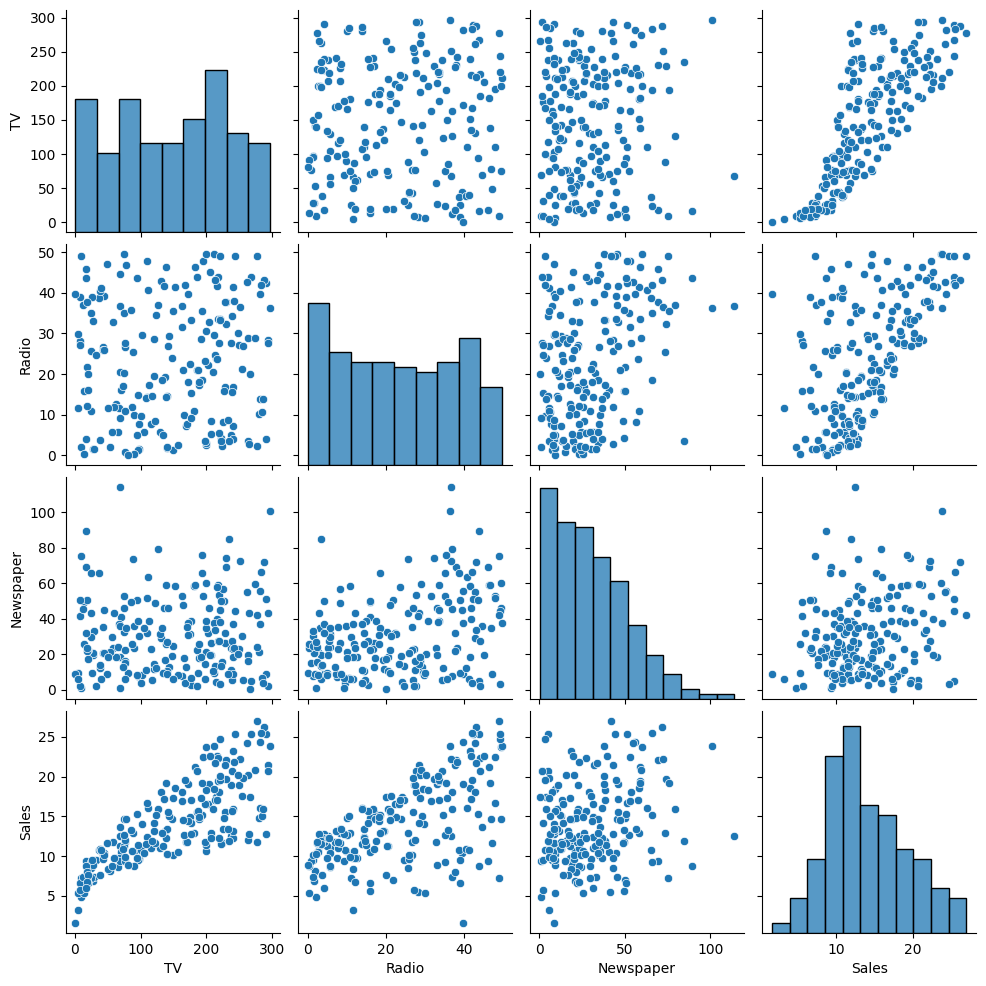

In [15]:
sns.pairplot(df)

<Axes: >

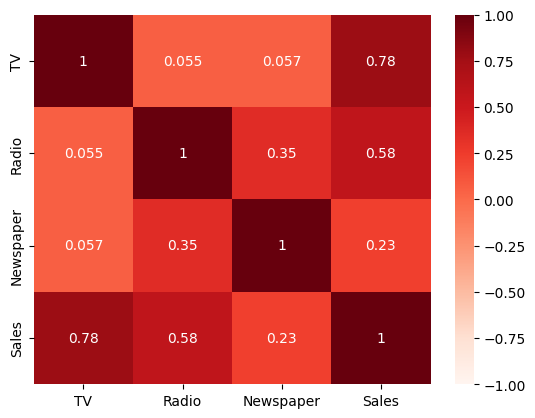

In [16]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='Reds', annot=True)

In [17]:
#회귀선 표시

Text(0.5, 1.0, 'The Regression Line Of ad Newspaper vs. Sales')

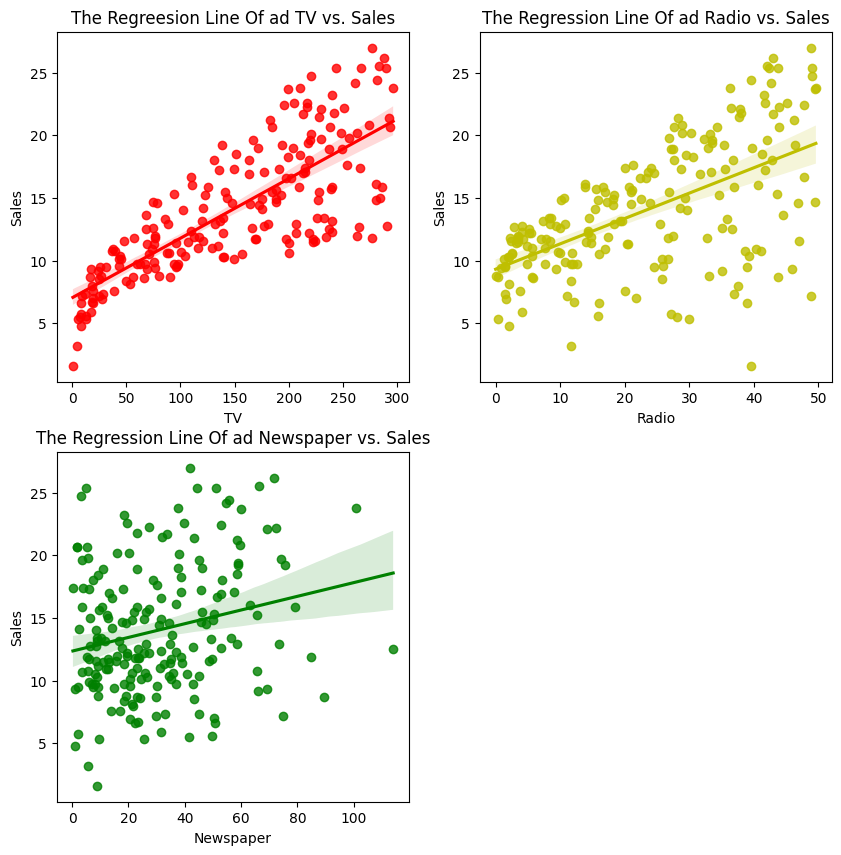

In [18]:
from matplotlib import figure
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.regplot(data=df, x='TV', y='Sales', color='r').set_title('The Regreesion Line Of ad TV vs. Sales')

plt.subplot(2,2,2)
sns.regplot(data=df,x='Radio',y='Sales',color='y').set_title('The Regression Line Of ad Radio vs. Sales')
plt.subplot(2,2,3)

sns.regplot(data=df,x='Newspaper',y='Sales',color='g').set_title('The Regression Line Of ad Newspaper vs. Sales')

In [19]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [20]:
x = df[['TV', 'Radio']]
x

,TV,Radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8
...,...,...
195,38.2,3.7
196,94.2,4.9
197,177.0,9.3
198,283.6,42.0


In [21]:
y = df[['Sales']]
y

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
linear = LinearRegression()

In [24]:
linear.fit(x,y)

LinearRegression()

In [25]:
linear.intercept_

array([2.92109991])

In [26]:
linear.coef_

array([[0.04575482, 0.18799423]])

In [27]:
file = 'linear_reg.csv'
pickle.dump(linear, open(file, 'wb')) # 그냥 등식을 저장함

In [28]:
linear.predict([[45, 13]])

C:\Users\Owner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[7.42399154]])

In [29]:
saved_model = pickle.load(open(file, 'rb'))

In [30]:
saved_model.predict([[45, 15]])

C:\Users\Owner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[7.79997999]])

In [31]:
linear.score(x, y)

0.8971942610828957